Імпортуємо бібліокеки

In [2]:
import torchvision.transforms as transforms
from torchvision import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

Завантажуємо дані

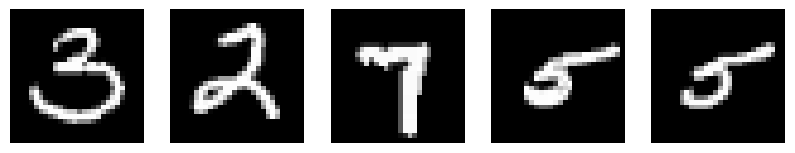

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

examples = iter(train_loader)
images, _ = next(examples)
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.show()


In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), nn.ReLU(),
            nn.Linear(128, 32), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 128), nn.ReLU(),
            nn.Linear(128, 28*28), nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [5]:
def train(model, criterion, optimizer, epoch):
    model.train()
    for epoch in range(epoch):
        for images, _ in train_loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            loss = criterion(outputs, images)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("\tEpoch", epoch + 1)

In [6]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
model.train()
train(model, criterion, optimizer, 10)

	Epoch 1
	Epoch 2
	Epoch 3
	Epoch 4
	Epoch 5
	Epoch 6
	Epoch 7
	Epoch 8
	Epoch 9
	Epoch 10


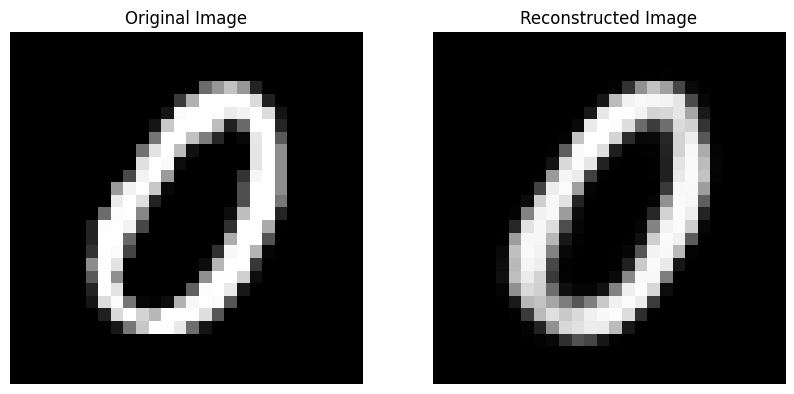

In [13]:
model.eval()

image, _ = next(iter(test_loader))

image = image.view(-1, 28*28)

model.eval()

with torch.no_grad():
    reconstructed_image = model(image)

reconstructed_image = reconstructed_image.view(1, 28, 28)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image.view(28, 28).squeeze(), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_image.squeeze(), cmap='gray')
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')

plt.show()
